In [ ]:
!pip install pycaret

In [ ]:
!pip install streamlit

  Using cached streamlit-1.47.1-py3-none-any.whl.metadata (9.0 kB)
  Using cached watchdog-6.0.0-py3-none-manylinux2014_x86_64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
Using cached streamlit-1.47.1-py3-none-any.whl (9.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pycaret.classification import *
import matplotlib.pyplot as plt

# Step 1: Load the DataFrame
ruta_archivo = "dataset_pca_3_components_personality.csv"  # Replace with actual path
df = pd.read_csv(ruta_archivo, sep=';')

# Step 2: Set up PyCaret
# Replace 'target_column_name' with the name of your target variable
clf_setup = setup(
    data=df,
    target='Personality',
    session_id=123
)



,Description,Value
0,Session id,123
1,Target,Personality
2,Target type,Binary
3,Original data shape,"(2498, 4)"
4,Transformed data shape,"(2498, 4)"
5,Transformed train set shape,"(1748, 4)"
6,Transformed test set shape,"(750, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Step 3: Compare all models and get the top 3
top3_models = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9314,0.9055,0.9334,0.9137,0.9227,0.8610,0.8623,1.5590
nb,Naive Bayes,0.9314,0.9086,0.9334,0.9137,0.9227,0.8610,0.8623,0.0260
svm,SVM - Linear Kernel,0.9314,0.9045,0.9334,0.9137,0.9227,0.8610,0.8623,0.0260
ridge,Ridge Classifier,0.9314,0.9046,0.9334,0.9137,0.9227,0.8610,0.8623,0.0260
qda,Quadratic Discriminant Analysis,0.9314,0.9097,0.9334,0.9137,0.9227,0.8610,0.8623,0.0250
lda,Linear Discriminant Analysis,0.9314,0.9046,0.9334,0.9137,0.9227,0.8610,0.8623,0.0240
gbc,Gradient Boosting Classifier,0.9279,0.9511,0.9295,0.9097,0.9188,0.8541,0.8553,0.3910
ada,Ada Boost Classifier,0.9274,0.9442,0.9269,0.9104,0.9181,0.8529,0.8538,0.1420
knn,K Neighbors Classifier,0.9268,0.9379,0.9295,0.9076,0.9177,0.8518,0.8532,0.0460
rf,Random Forest Classifier,0.9159,0.9308,0.9072,0.9033,0.9043,0.8293,0.8308,0.2850


Processing:   0%|          | 0/67 [00:00<?, ?it/s]


🔢 Modelo Top #1: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9160,0.8876,0.9179,0.8935,0.9055,0.8299,0.8302



📊 Matriz de Confusión - Modelo Top #1:


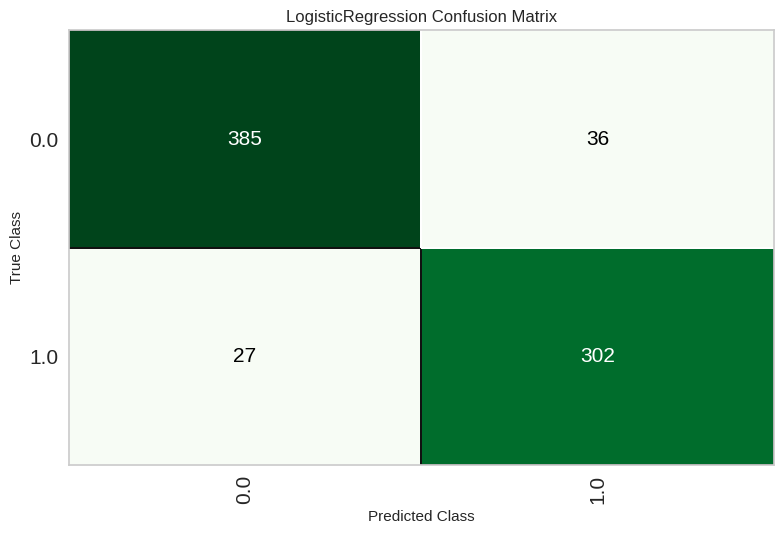


🔢 Modelo Top #2: GaussianNB(priors=None, var_smoothing=1e-09)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9160,0.8933,0.9179,0.8935,0.9055,0.8299,0.8302



📊 Matriz de Confusión - Modelo Top #2:


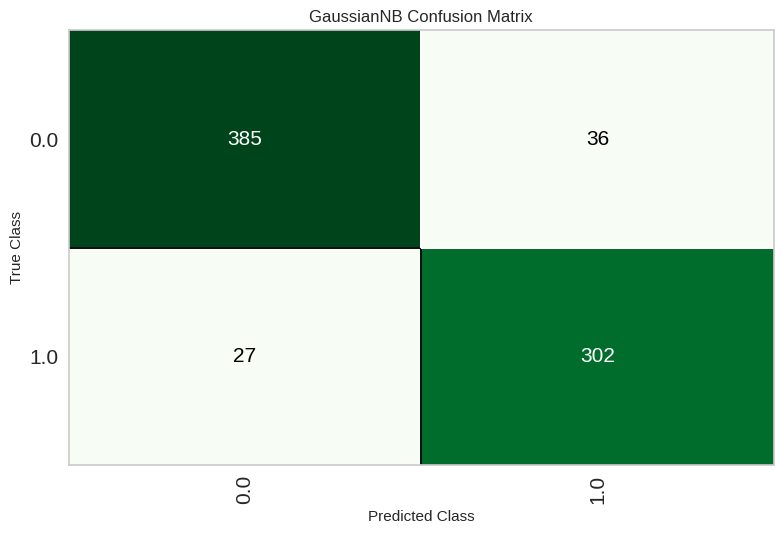


🔢 Modelo Top #3: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9160,0.9162,0.9179,0.8935,0.9055,0.8299,0.8302



📊 Matriz de Confusión - Modelo Top #3:


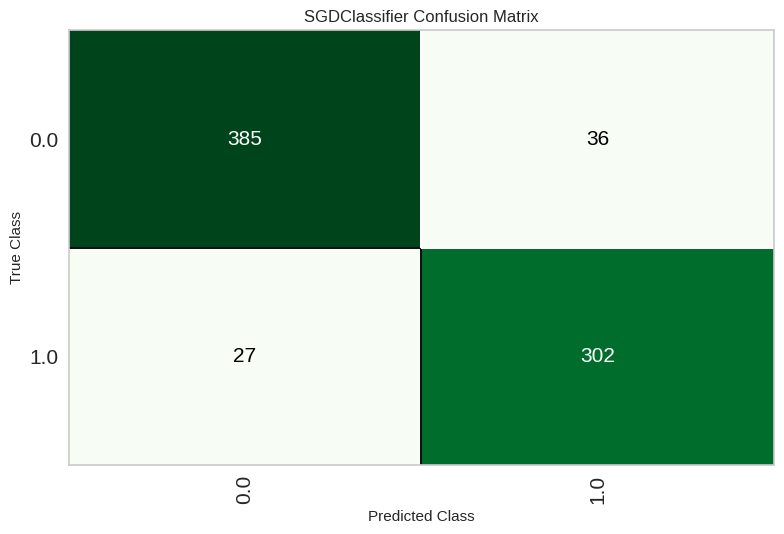

In [ ]:
for i, model in enumerate(top3_models, start=1):
    print(f"\n🔢 Modelo Top #{i}: {model}")

    # Train the model
    fitted_model = finalize_model(model)

    # Create predictions
    predictions = predict_model(fitted_model)

    # Display confusion matrix (without using Streamlit)
    print(f"\n📊 confusion matrix - Model Top #{i}:")
    plot_model(fitted_model, plot='confusion_matrix')
